In [ ]:
'''
1. applicate un sovracampionamento (artificial inflation) ad una classe nel training set
con un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor
che sono più difficili da discriminare). Si apprenda l'albero di decisione in queste condizioni.
Attenzione che in questo caso la suddivisione tra training set e test set non deve rilasciare
nel test set nessuna delle copie che abbiamo aggiunto, altrimenti si favorirebbe troppo il
classificatore dando copie presenti nel training set anche nel test set. Quindi se volete
usare la crossvalidation, dovete farla voi, da programma Python "a mano" (e non usare
quella fornita da scikit learn, che non fa questo controllo).
'''

'\napplicate un sovracampionamento (artificial inflation) ad una classe nel training set \ncon un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor che sono più difficili da discriminare). Si apprenda l\'albero di decisione in queste condizioni. Attenzione che in questo caso la suddivisione tra training set e test set non deve rilasciare nel test set nessuna delle copie che abbiamo aggiunto, altrimenti si favorirebbe troppo il classificatore dando copie presenti nel training set anche nel test set. Quindi se volete usare la crossvalidation, dovete farla voi, da programma Python "a mano" (e non usare quella fornita da scikit learn, che non fa questo controllo).\n'

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import sys
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot as plt

In [4]:
iris = load_iris()

In [ ]:
def artificial_infation(matrix_data, vector_target):
  for i in range(len(matrix_data)):
      if(vector_target[i] == 2 ): #or vector_target[i] == 1
        duplicated = matrix_data[i]
        for j in range(10):
          matrix_data = np.vstack([matrix_data, duplicated])
          if(vector_target[i] == 1):
            vector_target = np.append(vector_target, [1])
          else:
            vector_target = np.append(vector_target, [2])
  return matrix_data, vector_target

In [ ]:
#add the oversamples for virginica class (index = 2)
#np.set_printoptions(threshold=sys.maxsize) #printing the entire matrix
iris_data = iris.data
iris_target = iris.target
iris_data, iris_target = artificial_infation(iris_data, iris_target)

#permutation of the dataset
np.random.seed(0)
indices = np.random.permutation(len(iris_data))
iris_X_train = iris_data[indices]
iris_y_train = iris_target[indices]

In [ ]:
# fit the model to the training data
print(iris_X_train.shape)
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})
clf = clf.fit(iris_X_train, iris_y_train)

(650, 4)


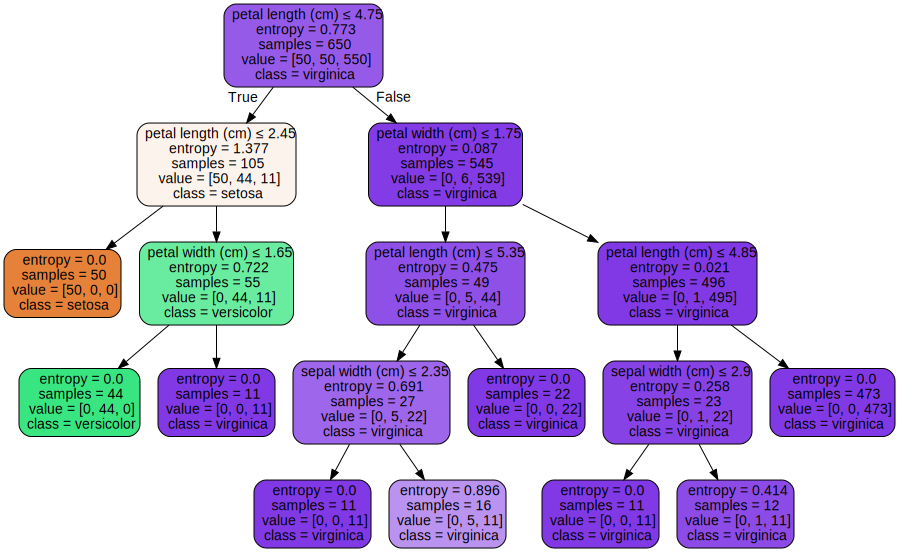

In [ ]:
graph = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph)
graph

In [ ]:
"""
L'albero ottenuto (con entropia come indice di purezza) presenta due foglie con
entropia maggiore di zero.
Se si duplica ogni campione 10 volte delle classi virginica e versicolor otteniamo
un'albero con tutte le foglie a entropia uguale a 0.0
"""

In [ ]:
iris_data = iris.data
iris_target = iris.target

#partizionare il dataset in n parti (n = 5)
num_elem_partition = int(len(iris_target)/5)
dict_partition = {}
for i in range(5):
  dict_partition[i] = int(((i+1)*num_elem_partition)-1)

#permutation of the dataset
np.random.seed(0)
indices = np.random.permutation(len(iris_data))
iris_data = iris_data[indices]
iris_target = iris_target[indices]

vector_clf = []
accuracies = []

#for all partions:
for i in range(5):
  #dividing training set and test set
  iris_X_test = iris_data[i*num_elem_partition:dict_partition[i]]
  iris_y_test = iris_target[i*num_elem_partition:dict_partition[i]]

  indexes_test = np.arange(i*num_elem_partition, dict_partition[i]+1, 1)

  iris_X_train = np.delete(iris_data, indexes_test, 0)
  iris_y_train = np.delete(iris_target, indexes_test)

  #generate artificial inflation
  iris_X_train, iris_y_train = artificial_infation(iris_X_train, iris_y_train)

  #instantiate a classifier and fit with the training data
  #after that calculate the accuray of the classifier
  clf_cross = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
  clf_cross = clf_cross.fit(iris_X_train, iris_y_train)
  vector_clf.append(clf_cross)
  predicted_y_test = clf_cross.predict(iris_X_test)
  accuracies.append(accuracy_score(iris_y_test, predicted_y_test))

print(accuracies)


[DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       min_samples_leaf=5, random_state=300), DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       min_samples_leaf=5, random_state=300), DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       min_samples_leaf=5, random_state=300), DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       min_samples_leaf=5, random_state=300), DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='entropy',
                       min_samples_leaf=5, random_state=300)]
[0.9655172413793104, 0.9310344827586207, 0.9655172413793104, 0.9655172413793104, 0.896551724137931]


In [ ]:
"""
2 b) modificare i pesi della stessa classe (si metta a 10 il peso per l'errata
predizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda
l'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del
punto 1.
"""

"\nb) modificare i pesi della stessa classe (si metta a 10 il peso per l'errata \npredizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda \nl'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del punto 1.\n\n"

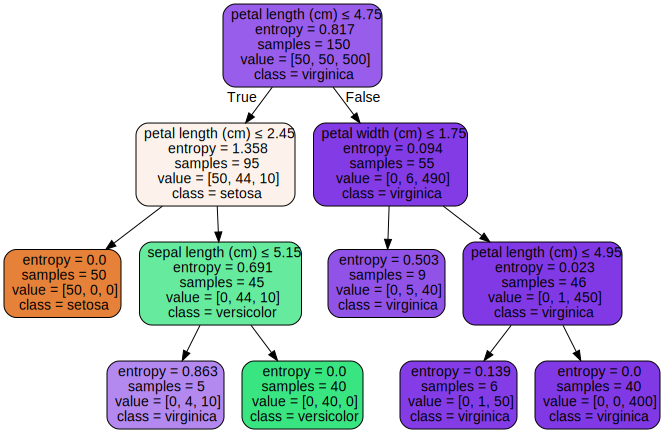

In [ ]:
iris_data = iris.data
iris_target = iris.target

#permutation of the dataset
np.random.seed(0)
indices = np.random.permutation(len(iris_data))
iris_X_train = iris_data[indices]
iris_y_train = iris_target[indices]

# fit the model to the training data with virginica class' weight: 10
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:10})
clf = clf.fit(iris_X_train, iris_y_train)

#print the tree model
graph = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph)
graph


In [ ]:
"""
3. Si apprendano gli alberi cercando di evitare l'overfitting (migliorando l'errore sul test set)
facendo 'tuning' (regolazione) degli iper-parametri: il minimo numero dei campioni per foglia (min_samples_leaf),
la massima profondità dell'albero (max_depth), i parametri di minimo decremento dell'impurezza (min_impurity_decrease),
massimo numero dei nodi foglia (max_leaf_nodes), ecc.
Si consiglia di usare la classe gridSearchCV per questo tipo di tuning di molti parametri.
"""

In [6]:
#gridSearchCV does not keep the classficators' list, therefore we don't use it.
iris_data = iris.data
iris_target = iris.target

parameters = {'criterion':['gini', 'entropy'], 'random_state': [300], 'max_depth': np.arange(1, 10), 'min_samples_leaf': np.arange(2,10), 'max_leaf_nodes': np.arange(2,10), 'min_impurity_decrease': np.arange(0.1,0.9)}
treeCLF = tree.DecisionTreeClassifier()
grid = GridSearchCV(treeCLF, parameters, scoring='accuracy', cv=5)
grid.fit(iris_data, iris_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_impurity_decrease': array([0.1]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [300]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

data = pd.DataFrame({'param': grid.cv_results_["params"], 'acc': grid.cv_results_["mean_test_score"]})
data_final = data[data["acc"] >= 0.939]
data_final

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'random_state': 300}
0.9399999999999998
720


,param,acc
720,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'random_state': 300}",0.94
721,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3, 'random_state': 300}",0.94
722,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 4, 'random_state': 300}",0.94
728,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'random_state': 300}",0.94
729,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3, 'random_state': 300}",0.94
730,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 4, 'random_state': 300}",0.94
736,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'random_state': 300}",0.94
737,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 3, 'random_state': 300}",0.94
738,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 4, 'random_state': 300}",0.94
744,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'random_state': 300}",0.94


[0.98, 0.98, 0.98, 0.98, 0.98, 0.98]
[0.9399999999999998, 0.9399999999999998, 0.9399999999999998, 0.9399999999999998, 0.9399999999999998, 0.9399999999999998]


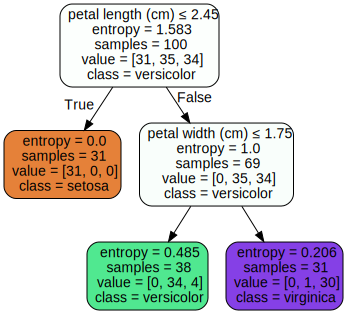

In [7]:
classifiers = [] #list of tuned classifiers
accuracies_mean = [] #it contains the means of every classifiers using the crossvalidation
accuracies = [] #the accuracies of every classifiers for every prediction on the test set

#max_leaf_node = numero totale dei nodi foglia dell'albero (numero incluso) -> buono per evitare l'overfitting
#min_samples_leaf = numero di elementi affinché si possa creare una foglia, blocchiamo lo split dopo un certo totale -> ottimo per evitare overfitting
#min_impurity_decrease = il nodo verrà splittato se l'impurità induce un decremento grande o uguale al valore

classifiers.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300 ,min_samples_leaf=2, max_depth=3, max_leaf_nodes=4, min_impurity_decrease=0.1))
classifiers.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=2, max_depth=8, max_leaf_nodes=6, min_impurity_decrease=0.1))
classifiers.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=2, max_depth=6, max_leaf_nodes=4, min_impurity_decrease=0.1))
classifiers.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=4, max_depth=4, max_leaf_nodes=5, min_impurity_decrease=0.1))
classifiers.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=3, max_depth=3, max_leaf_nodes=5, min_impurity_decrease=0.1))
classifiers.append(tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=3, max_depth=7, max_leaf_nodes=5, min_impurity_decrease=0.1))

for clf in classifiers:
  accuracies_mean.append(cross_val_score(clf, iris.data, iris.target, cv=5).mean())
  X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.33, random_state=42, shuffle=True)
  clf.fit(X_train, y_train)
  y_predicted = clf.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_predicted))

print(accuracies)
print(accuracies_mean)

#print the tree model
graph = tree.export_graphviz(classifiers[0], out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(graph)
graph

In [ ]:
"""
4. si costruisca la matrice di confusione dell'albero creato sul test set e la
si visualizzi.
"""

In [ ]:
for i in range(len(classifiers)):
  print("Classfier: " + str(i+1))
  print(confusion_matrix(y_test,classifiers[i].predict(X_test)))
  print("\n")

Classfier: 1
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Classfier: 2
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Classfier: 3
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Classfier: 4
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Classfier: 5
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


Classfier: 6
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]




In [ ]:
"""
5. si costruiscano le curve ROC (o curve nello spazio di coverage) e le si mostri
per ciascun modello ad albero creato su un problema binario (con 1 sola classe positiva):
per ciascun modello dovete costruire tre curve, una per ciascuna classe, considerata a
turno la classe positiva.
"""

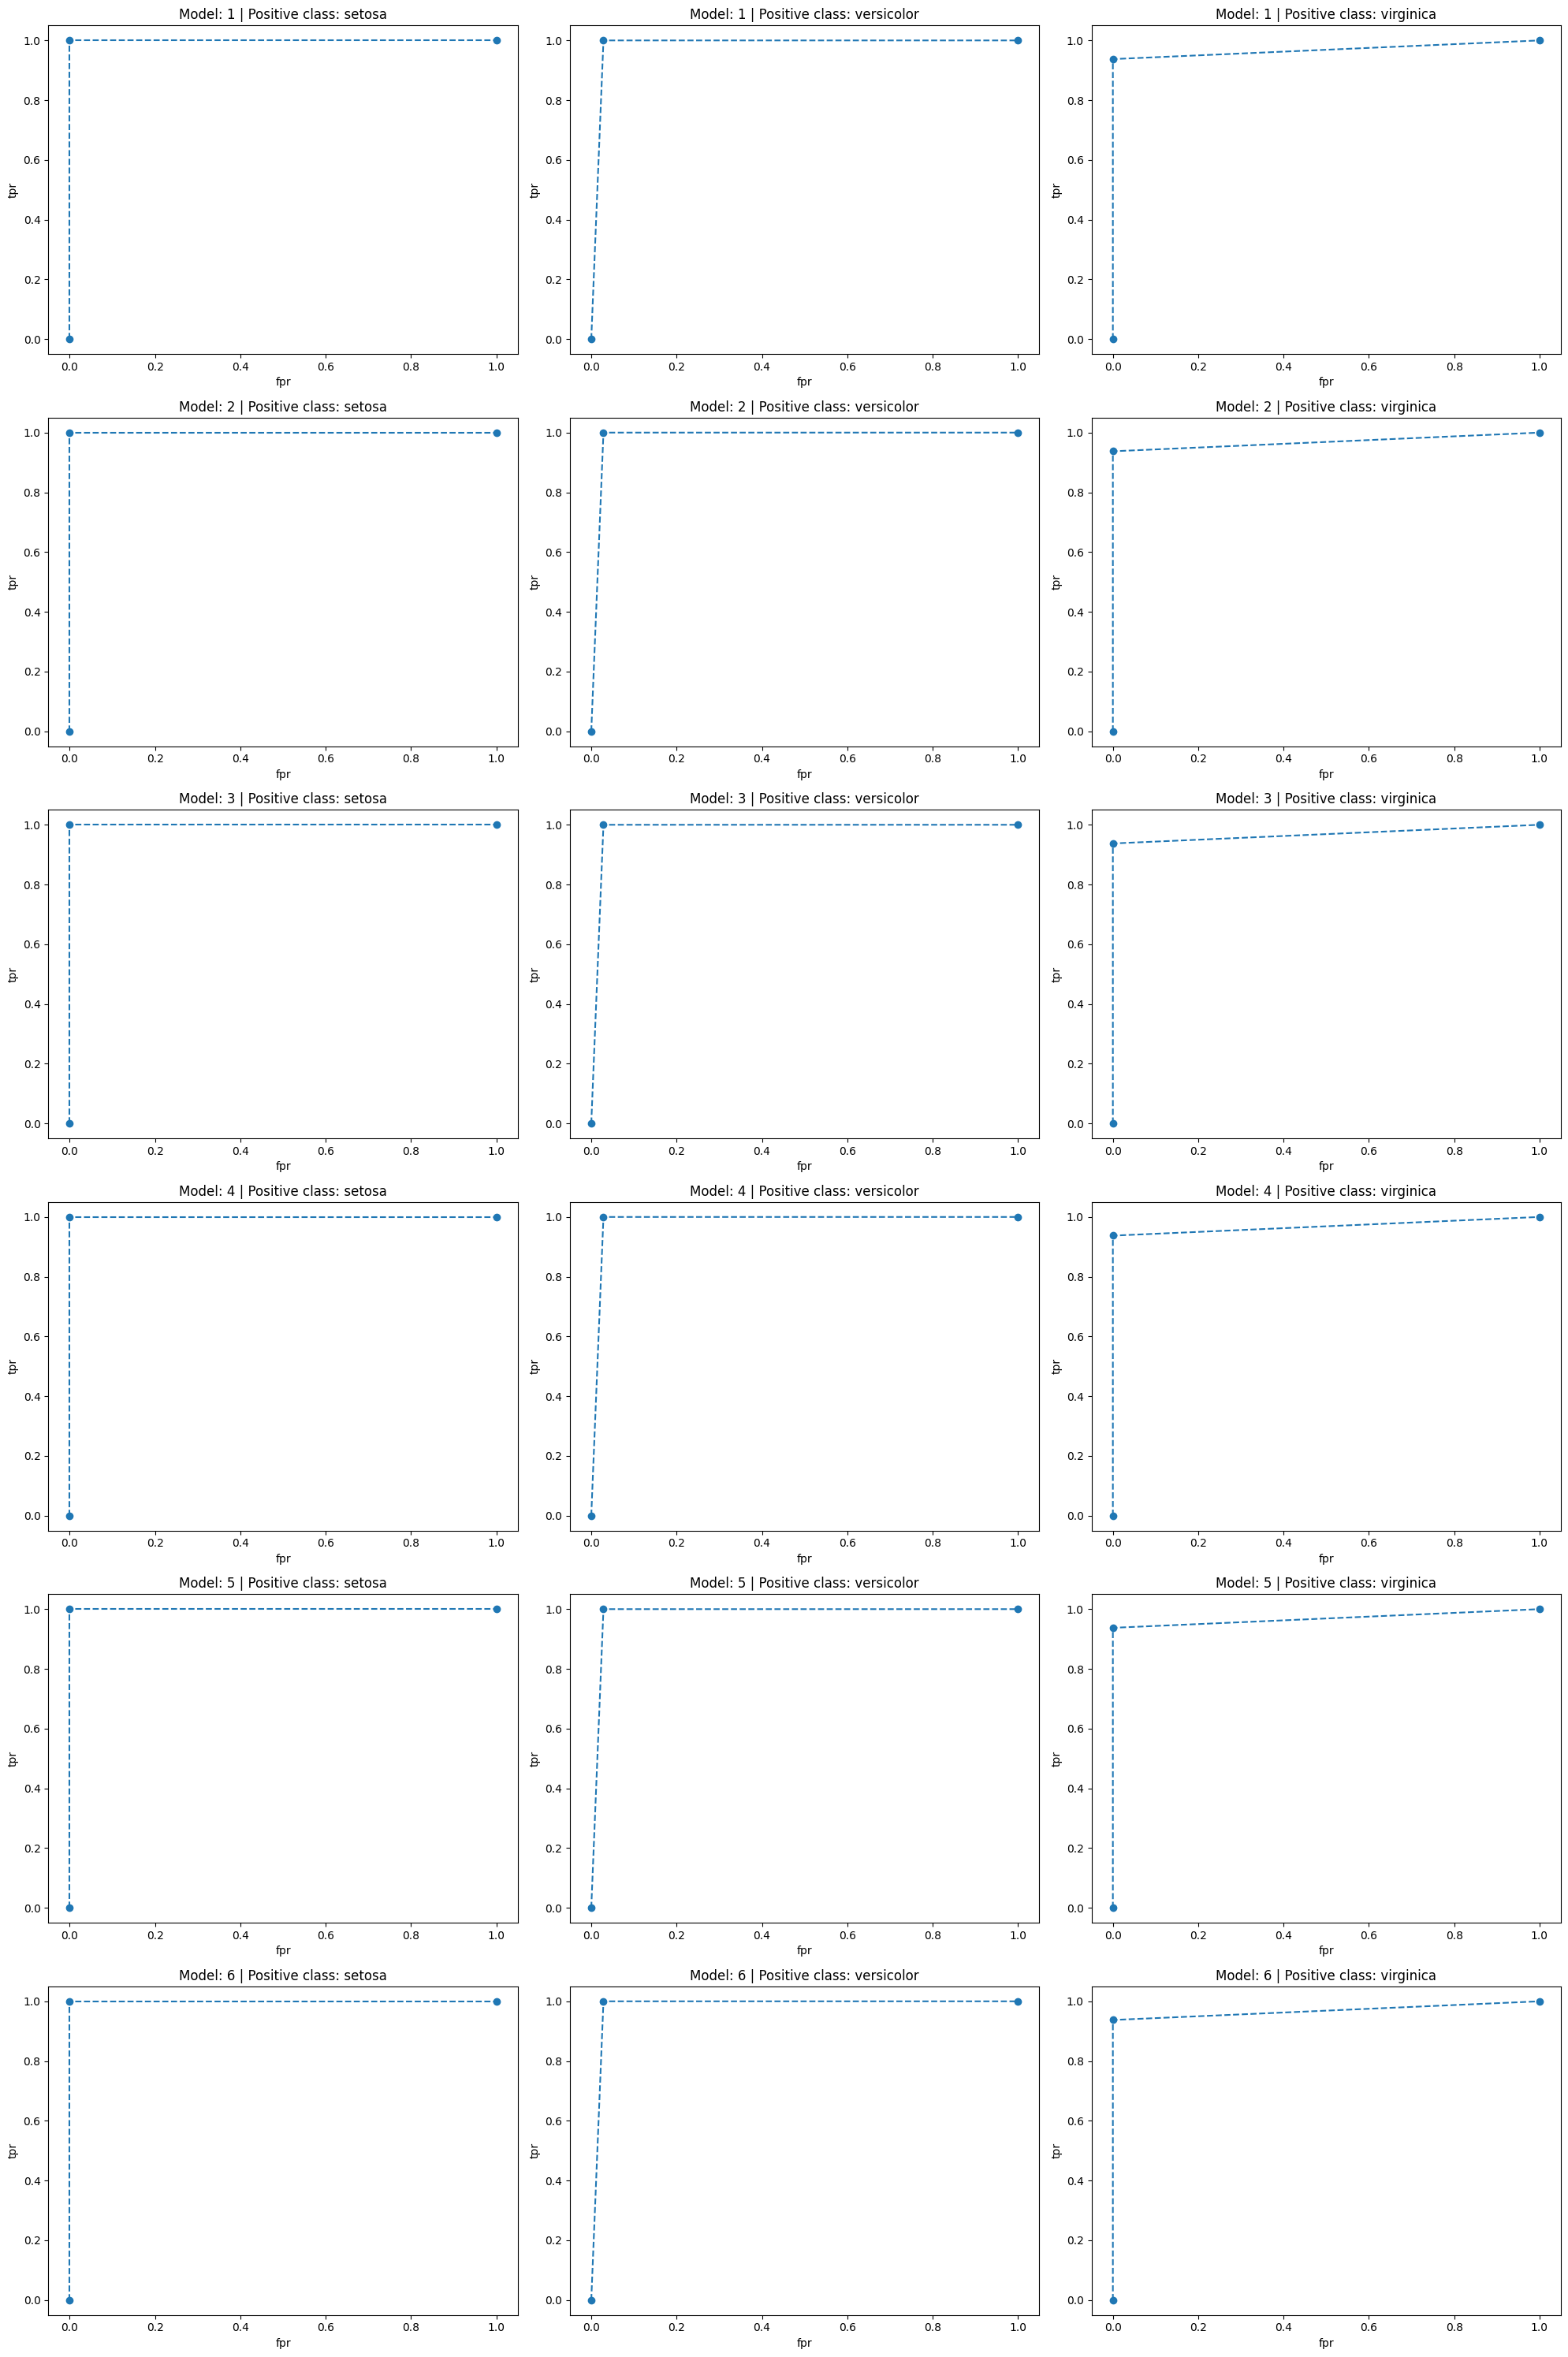

In [ ]:
#prepare the entire figure
fig, axs = plt.subplots(len(classifiers),3,figsize=(20,30))

for i in range(len(classifiers)):
  for j in range(3):

    #predict the actual classifier and modify results and predictions in based on the actual class we want to set as positive
    #set 1 for positive class
    #set -1 for negative classes
    predictions = classifiers[i].predict(X_test)
    fpr, tpr, _ = roc_curve(np.where(y_test==j, 1, -1), np.where(predictions==j, 1, -1))

    #modify the actual plot
    axs[i,j].plot(fpr, tpr, marker='o', linestyle='--')
    axs[i,j].set_title(f'Model: {i+1} | Positive class: {iris.target_names[j]}')

#add the x and y axis legend
for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

#adds space bewtween the subplots and shows them
fig.tight_layout()
fig.show()